<h1>HW6</h1>

# Question
### (Inverse Transform Sampling) Complete the following exercises 

### 1.1

Create a function to sample from a Gaussian distribution with mean $\mu$ and standard deviation $\sigma$:

* Function name: sample_gaussian

* Input: $\mu$, $\sigma$, n

* Output: a n-element vector of random sample from Gaussian~N($\mu$, $\sigma$)

* You are `not allowed` to use the Distributions.jl package or any existing sampler
* You are `allowed` to use SpecialFunctions.jl for special functions and rand for random number generation


An [example](https://stephens999.github.io/fiveMinuteStats/inverse_transform_sampling.html) of inverse transform sampling

In [1]:
import Pkg
Pkg.add(["SpecialFunctions", "Plots"])

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


In [2]:
import SpecialFunctions
import Plots
using SpecialFunctions
using Plots

In [9]:
function sample_gaussian(μ, σ, n)
    x = []
    for i in 1:n
        y = rand()
        sample = μ + (σ * sqrt(2) * erfinv((2 * y) -1))
        push!(x, sample)
    end
    return x
end

sample_gaussian (generic function with 1 method)

### 1.2


1. Use the sampler above to draw 10000 samples from a Gaussian distribution~N($\mu$ = -1, $\sigma$ = 2)
2. Plot the histogram of the 10000 samples 
3. Use the Distributions.jl package to obtain the pdf of the same Gaussian distribution~N($\mu$ = -1, $\sigma$ = 2) using x = -8:0.001:6
4. Plot the pdf on top of the histogram from step 2

In [5]:
import Pkg
Pkg.add("Distributions")
using Distributions

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


In [10]:
samp = sample_gaussian(-1, 2, 10000)

10000-element Vector{Any}:
 -3.6952657420407182
 -3.313792412602242
 -1.8199350872603697
 -2.094882468855253
 -3.078146411680115
  0.5378286955244094
  0.764172616831112
  0.7541269083952933
  0.11432456182450057
 -3.290752214279938
  1.8675654975521518
 -3.4296948337278863
 -0.5189749249636246
  ⋮
  0.10972803854736157
 -3.1940468154937807
 -3.2140983787735076
  4.046990455557588
 -0.9218700883395209
  1.0589461741277
 -0.7862321190386095
  0.5079248352024299
 -3.2245064219594908
 -2.9653096138813506
 -1.4960055343376655
 -0.6824245468989911

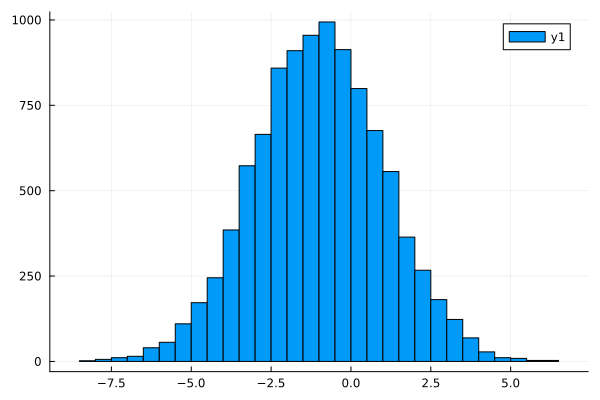

In [12]:
histogram(samp)

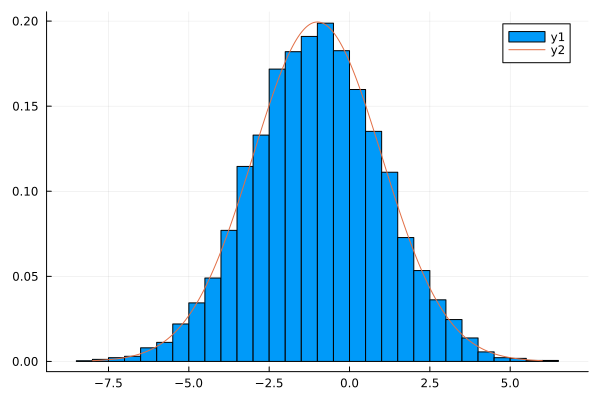

In [14]:
x_pdf = -8:0.001:6
pdf_1 = pdf.(Normal(-1, 2), x_pdf)
histogram(samp, normalize = true)
plot!(x_pdf, pdf_1)